In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("./penguins_size.csv")

In [3]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
label_encoder_island=LabelEncoder()
label_encoder_island.fit_transform(data["island"])
data["island_numerica"]=label_encoder_island.fit_transform(data["island"])

In [8]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_numerica
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,2
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


In [9]:
label_encoder_island.inverse_transform([0])

array(['Biscoe'], dtype=object)

In [26]:
def analisi_grafica(target,dati,features=None,dropna=True,alpha=1):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    '''
    funzione che analizza graficamente una funzione data in input
    
    parametri:
    traget: nome della colonna targhet della funzione
    dati: dataframe
    fratures: defaul value-> None, da passare se si vuole specificaere su quali colonne analizzare il dataframe, se si 
    lascia non verrà analizzato sulle colonne numeriche
    dropna: defaul value-> True
    alpha: defaul value->1 dare diverso valore per cambiare la trasparenza
    '''
    
    colonne=np.array(dati.columns)
    colonne_num=[]
    
    if features==None:
        for colonna in colonne:

            if (str(type(dati[colonna][1]))[8:19] == 'numpy.float') or (str(type(dati[colonna][1]))[8:17] == 'numpy.int'):
                
                colonne_num.append(colonna)
        
    else:
        colonne_num=features
        
    colonne_num=np.array(colonne_num).flatten()
    dataframe=dati.copy()
    if dropna:
        dataframe=dataframe.dropna(axis="index",subset=colonne_num)

    col_specie={}
    for specie in dataframe[target]:
        col_specie[specie]=np.random.uniform(0,1,3)
    colori=[]
    for specie in dataframe[target]:
        colori.append(col_specie[specie])
    colori=np.array(colori)

    n=np.size(colonne_num)
    fig, axs=plt.subplots(ncols=n, nrows=n, figsize=(20,15))
    for riga in range(n):
        for colonna in range(n):
            if riga==colonna:
                for specie in col_specie.keys():
                    axs[riga, colonna].hist(dataframe[dataframe[target]==specie][colonne_num[riga]].values, color=col_specie[specie], label=specie,alpha=alpha)
                    axs[riga, colonna].set_xlabel(colonne_num[riga])
                    axs[riga, colonna].set_ylabel("Frequenza")
                    axs[riga, colonna].legend()
            else:
                for specie in col_specie.keys():
                    axs[riga, colonna].scatter(dataframe[dataframe[target]==specie][colonne_num[riga]].values, dataframe[dataframe[target]==specie][colonne_num[colonna]].values, color=col_specie[specie], s=10, label=specie)
                    axs[riga, colonna].set_xlabel(colonne_num[riga])
                    axs[riga, colonna].set_ylabel(colonne_num[colonna])
                    axs[riga, colonna].legend()

    plt.show()


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
 7   island_numerica    344 non-null    int32  
dtypes: float64(4), int32(1), object(3)
memory usage: 20.3+ KB


In [16]:
data_ridotto=data[data.columns[:-2]].copy()

In [17]:
data_ridotto

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [18]:
data_ridotto.dropna(inplace=True)

In [19]:
data_ridotto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
dtypes: float64(4), object(2)
memory usage: 18.7+ KB


In [20]:
label_encoder_island=LabelEncoder()
label_encoder_island.fit_transform(data_ridotto["island"])
data_ridotto["island_numerica"]=label_encoder_island.fit_transform(data_ridotto["island"])

In [21]:
label_encoder_island=LabelEncoder()
label_encoder_island.fit_transform(data_ridotto["species"])
data_ridotto["species_numerica"]=label_encoder_island.fit_transform(data_ridotto["species"])

In [22]:
data_ridotto

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_numerica,species_numerica
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0,2


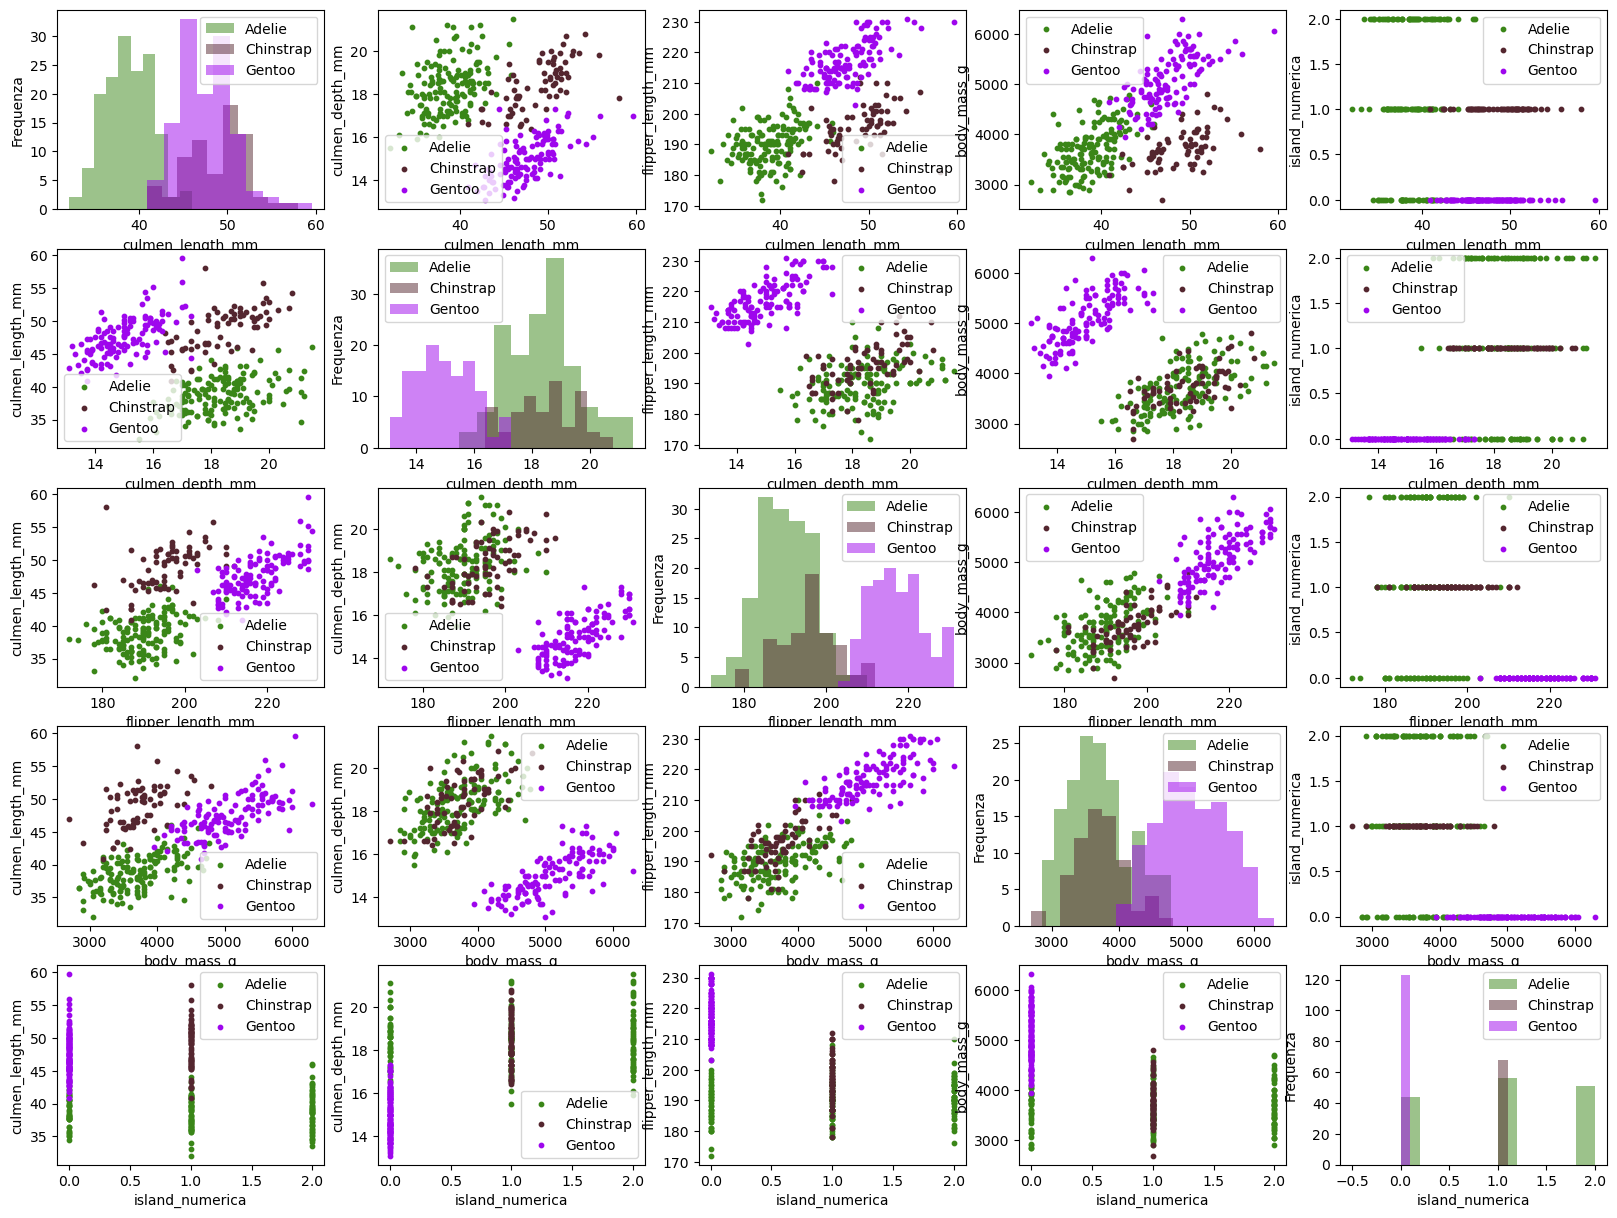

In [27]:
analisi_grafica("species",data_ridotto,["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g","island_numerica"],alpha=0.5)

più abbiamo istogrammi separati più la features è importante

se nell'analisi grafica non si ha mai una separazione netta la rete neurale per funzionare deve usare almeno 3 features,
si può unsare un fit in un form